#          Data Analysis and Predictive Modeling of Lung Cancer Risk Factors 
### -Abhishek Basnet 

## Data Cleaning and EDA

Basic Statistical Summary of the Dataset:
               age       gender  air_pollution  alcohol_use  dust_allergy  \
count  1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
mean     37.174000     1.402000         3.8400     4.563000      5.165000   
std      12.005493     0.490547         2.0304     2.620477      1.980833   
min      14.000000     1.000000         1.0000     1.000000      1.000000   
25%      27.750000     1.000000         2.0000     2.000000      4.000000   
50%      36.000000     1.000000         3.0000     5.000000      6.000000   
75%      45.000000     2.000000         6.0000     7.000000      7.000000   
max      73.000000     2.000000         8.0000     8.000000      8.000000   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
count           1000.000000   1000.000000           1000.000000   
mean               4.840000      4.580000              4.380000   
std                2.107805      2.126999              1.848518

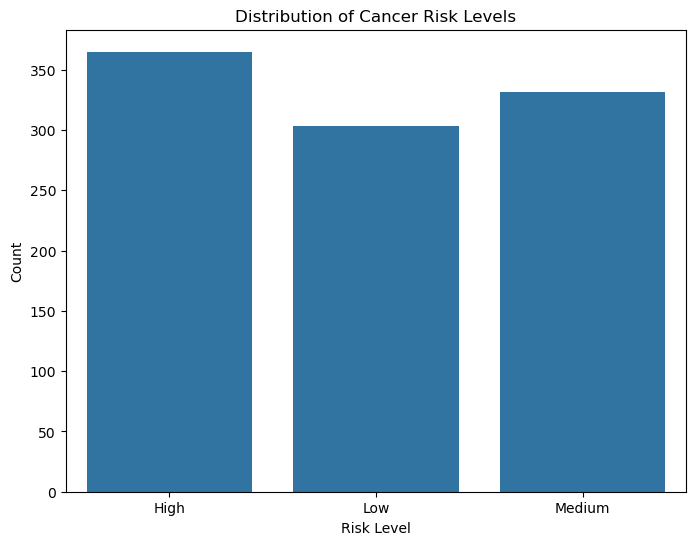

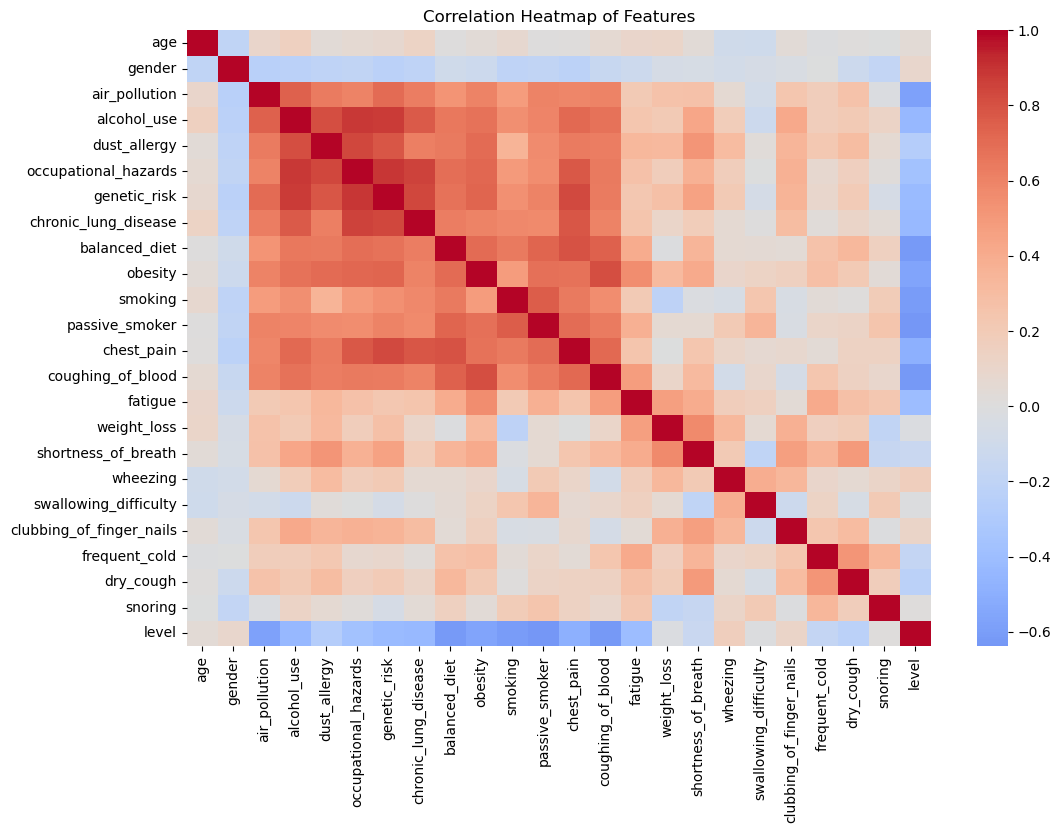

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset
df = pd.read_csv('C:/Users/User/DataScience Lab Works/cancer patient data sets.csv')

# Cleaning data by standardizing column names and dropping unnecessary columns
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.drop(columns=['index', 'patient_id'], inplace=True, errors='ignore')

# Displaying basic statistical summary and check for missing values
print("Basic Statistical Summary of the Dataset:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Encoding the categorical target variable 'level' into numerical values
label_encoder = LabelEncoder()
df['level'] = label_encoder.fit_transform(df['level'])

# Visualizing the distribution of cancer risk levels with a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='level', data=df)
plt.title('Distribution of Cancer Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.show()

# Separation of features (X) and target variable (y)
X = df.drop(columns=['level'])
y = df['level']

# Creating and displaying a correlation heatmap to show feature relationships
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.show()

# Standardizing numerical features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



## Model Selection and Training

Random Forest - RMSE: 0.005656854249492385, R² Score: 0.9999553057020147
Linear Regression - RMSE: 0.3723531072944586, R² Score: 0.8063524054445497
Support Vector Regressor - RMSE: 0.08859402233855022, R² Score: 0.9890374652828331
Gradient Boosting - RMSE: 0.016335972738997052, R² Score: 0.9996272718945085
Best model based on RMSE: Random Forest


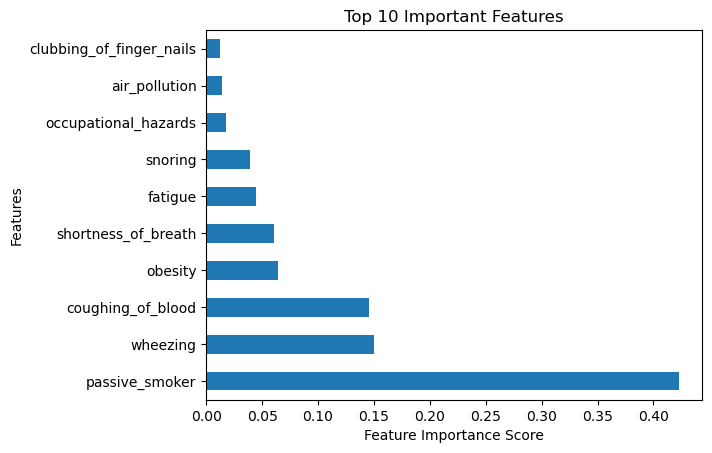

                              RMSE  R² Score
Random Forest             0.005657  0.999955
Linear Regression         0.372353  0.806352
Support Vector Regressor  0.088594  0.989037
Gradient Boosting         0.016336  0.999627


In [9]:
# Splitting the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Defining and training multiple regression models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    # Fit the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R² Score': r2}
    print(f'{name} - RMSE: {rmse}, R² Score: {r2}')

# Identifying the best performing model based on lowest RMSE
best_model = min(results, key=lambda k: results[k]['RMSE'])
print(f'Best model based on RMSE: {best_model}')

# Visualizing feature importance from the Random Forest model
rf_model = models['Random Forest']
feature_importances = pd.Series(rf_model.feature_importances_, index=df.drop(columns=['level']).columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features")
plt.show()

# Displaying Model Comparison Results
results_df = pd.DataFrame(results).T
print(results_df)
